# Joiner Beta's Analysis

Note that the interactive plots require the jupyter widgets extension for jupyter lab to be installed. This can currently not be managed in a conda env but can be installed using  
`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Call `help(hm.chart_name)` for information on arguments etc. for each charting function.


In [59]:
import sys
import os
home = os.path.expanduser('~')
sys.path.append(home + '/mc/witan.send.analysis/inference_analysis/')

import heatmaps as hm
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd

%matplotlib inline

In [60]:
base_dir = home + "/mc/witan.send/data/demo/"

data_dir = base_dir + "data/"
transitions_csv = data_dir + "/transitions.csv"

results_dir = base_dir + "results/" 
results_for_checking_dir = base_dir + "results_for_checking_1000/"

# Model Parameters

In [61]:
ipd.Code(filename=results_for_checking_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-14", :time "15:16:52"},
  :end {:date "2019-03-14", :time "15:27:40"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "master",
  :git-commit-id "d4a99c4",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/d4a99c4b13f1ee2369f68184d1d07af0f9b499c9"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [62]:
ipd.Code(filename=results_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-14", :time "14:32:31"},
  :end {:date "2019-03-14", :time "14:43:08"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "tdf/joiner-unobserved-ay",
  :git-commit-id "572163a",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/572163a132694dc897cefeb146d0b657cadd8e97"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [63]:
ipd.Code(filename=results_for_checking_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 1000},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results_for_checking_1000",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

In [64]:
ipd.Code(filename=results_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 1000},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

# Transitions

# Transitions

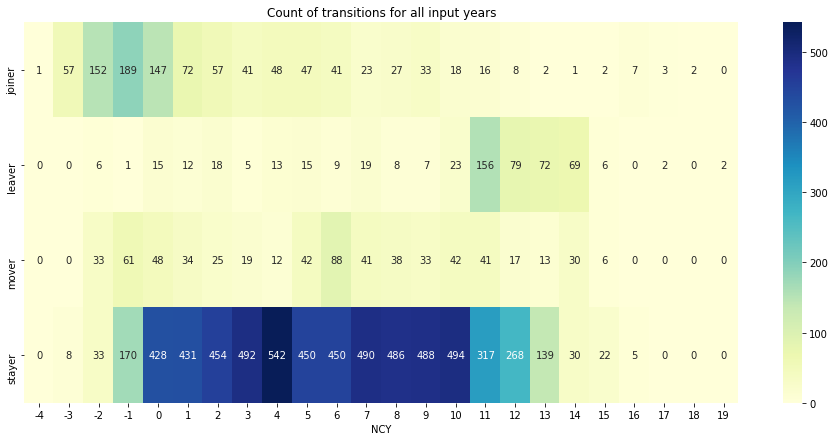

In [65]:
fig, ax = hm.transition_counts(transitions_csv)

# Joiners

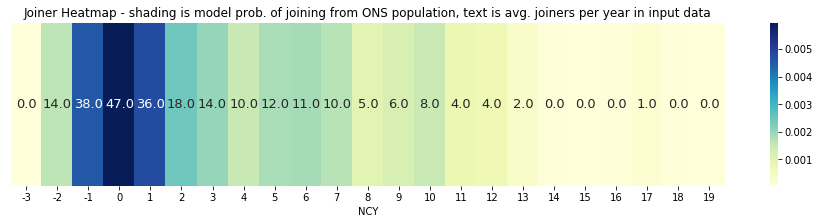

In [66]:
fig, ax = hm.joiner_beta(results_dir)

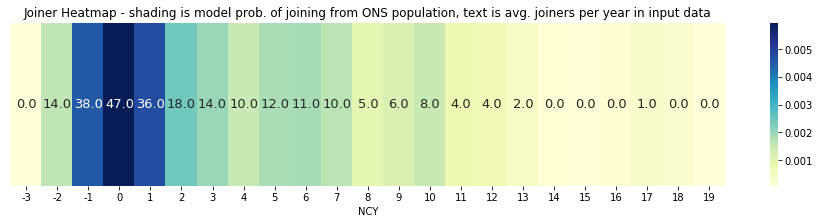

In [67]:
fig, ax = hm.joiner_beta(results_for_checking_dir)

# Chart Comparison

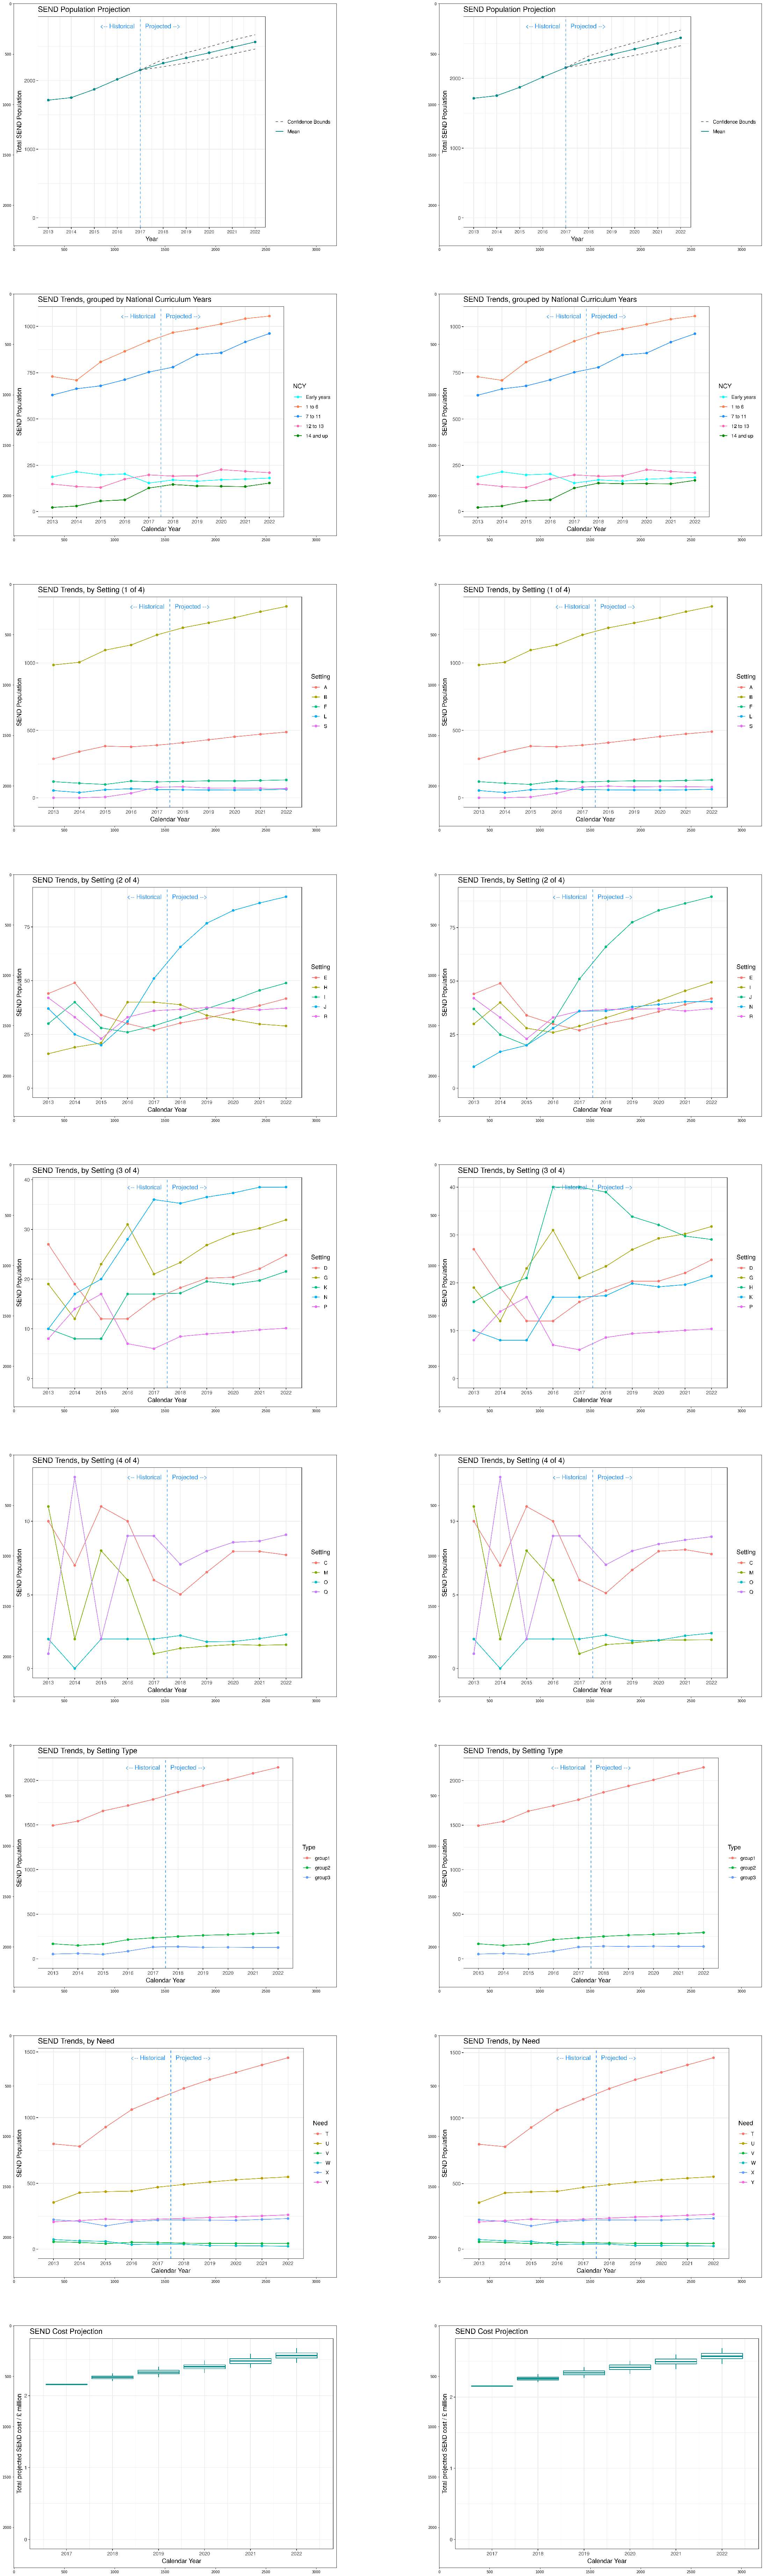

In [76]:
charts = ["Total_Population.png",
          "NCY_Population_Trends.png",
          "Settings_Trends_1.png",
          "Settings_Trends_2.png",
          "Settings_Trends_3.png",
          "Settings_Trends_4.png",
          "Setting_Type_Counts.png",
          "Need_Trends.png",
          "Total_Cost.png"]

fig, ax = plt.subplots(len(charts),2,figsize=(40, len(charts) * 15))

def imagerow(row, filename):
    ax[row,0].imshow(plt.imread(results_dir + filename))
    ax[row,1].imshow(plt.imread(results_for_checking_dir + filename))

for i, filename in enumerate(charts):
    imagerow(i, filename)
    

# Validation Comparison

Functions to work out validation differences

Quick note on validation:
 - three runs
 - 13/14 to predict 15,16,17 (n-transitions 1)
 - 13/14/15 to predict 16/17 (n-transitions 2)
 - 13/14/15/16 to predict 17 (n-transitions 3)
 
 

In [19]:
def analyse_validation(index_cols):
    def fn(path,title):
        df = pd.read_csv(path)
        df = df.set_index(index_cols)
        df = df[['ground-truth','mean']]
        df['diff'] = df['mean'] - df['ground-truth']
        df['fdiff'] = round(df['mean']/df['ground-truth'],3)
        df['fdiff'] = df['fdiff'].fillna(0)
        df.columns = pd.MultiIndex.from_product([[title],df.columns])
        return df
    return fn
    
analyse_count_validation = analyse_validation(['calendar-year', 'n-transition'])
analyse_state_validation = analyse_validation(['calendar-year', 'n-transitions', 'academic-year', 'need-setting'])

### Count Per Calendar Year Differences

In [77]:
results_count = analyse_count_validation(results_dir + "/validation_results_count.csv", "results")
results_for_checking_count = analyse_count_validation(results_for_checking_dir + "/validation_results_count.csv", "results_for_checking")
validation_count = pd.concat([results_for_checking_count, results_count], axis=1)
validation_count

results_for_checking                          \
                                   ground-truth     mean    diff  fdiff   
calendar-year n-transition                                                
2015          1                            1877  1847.08  -29.92  0.984   
2016          1                            2003  1906.32  -96.68  0.952   
2017          1                            2153  1995.16 -157.84  0.927   
2016          2                            2003  2009.93    6.93  1.003   
2017          2                            2153  2115.61  -37.39  0.983   
              3                            2153  2123.11  -29.89  0.986   

                                results                          
                           ground-truth     mean    diff  fdiff  
calendar-year n-transition                                       
2015          1                    1877  1847.08  -29.92  0.984  
2016          1                    2003  1906.32  -96.68  0.952  
2017          1                    2153  1995.16 -157.84  0.927  
2016          2                    2003  2008.80    5.80  1.003  
2017          2                    2153  2115.83  -37.17  0.983  
              3                    2153  2122.72  -30.28  0.986

Are all results below a perentage threshold difference?

In [21]:
pdiff_threshold = 0 # percentage difference between validation
validation_count[100 * (validation_count['results_for_checking','fdiff'] - validation_count['results','fdiff']).abs() > pdiff_threshold].empty

True

note: this may be a better check than the current md5sum based acceptance test in the model

### State Differences

In [22]:
results_state = analyse_state_validation(results_dir + "/validation_results_state.csv", "results")
results_for_checking_state = analyse_state_validation(results_for_checking_dir + "/validation_results_state.csv", "results_for_checking")
validation_state = pd.concat([results_for_checking_state, results_state], axis=1)
validation_state.head(10)

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1             0             T-K                             0   
                            11            Y-F                             0   
                            4             V-H                             0   
                            8             Y-R                             0   
                            15            U-E                             0   
                            3             W-E                             0   
                            9             U-C                             0   
                            11            V-I                             1   
                            0             V-O                             0   
                            10            V-L                             0   

                                                                              \
                                                        mean  diff     fdiff   
calendar-year n-transitions academic-year need-setting                         
2015          1             0             T-K           1.36  1.36       inf   
                            11            Y-F           0.03  0.03       inf   
                            4             V-H           0.01  0.01       inf   
                            8             Y-R           0.02  0.02       inf   
                            15            U-E           0.00  0.00  0.000000   
                            3             W-E           0.01  0.01       inf   
                            9             U-C           0.01  0.01       inf   
                            11            V-I           1.86  0.86  1.860000   
                            0             V-O           0.01  0.01       inf   
                            10            V-L           0.02  0.02       inf   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2015          1             0             T-K                     0  1.36   
                            11            Y-F                     0  0.03   
                            4             V-H                     0  0.01   
                            8             Y-R                     0  0.02   
                            15            U-E                     0  0.00   
                            3             W-E                     0  0.01   
                            9             U-C                     0  0.01   
                            11            V-I                     1  1.86   
                            0             V-O                     0  0.01   
                            10            V-L                     0  0.02   

                                                                        
                                                        diff     fdiff  
calendar-year n-transitions academic-year need-setting                  
2015          1             0             T-K           1.36       inf  
                            11            Y-F           0.03       inf  
                            4             V-H           0.01       inf  
                            8             Y-R           0.02       inf  
                            15            U-E           0.00  0.000000  
                            3             W-E           0.01       inf  
                            9             U-C           0.01       inf  
                            11            V-I           0.86  1.860000  
                            0             V-O           0.01       inf  
                            10            V-L           0.02       inf

In [34]:
pdiff_threshold = 1 # percentage difference between validation
diff_threshold = 0.5 # population difference between validation

percentage_mask = 100 * (validation_state['results_for_checking','fdiff'] - validation_state['results','fdiff']).abs() > pdiff_threshold
diff_mask = (validation_state['results_for_checking', 'diff'] - validation_state['results','diff']).abs() > diff_threshold
validation_state[percentage_mask & diff_mask].empty


False

#### Which States are >1 pop difference and > 0.5% different?

In [78]:
validation_state[percentage_mask & diff_mask]

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2016          2             3             T-B                            54   
2017          3             0             T-B                            38   

                                                                             \
                                                         mean   diff  fdiff   
calendar-year n-transitions academic-year need-setting                        
2016          2             3             T-B           50.38  -3.62  0.933   
2017          3             0             T-B           50.17  12.17  1.320   

                                                            results         \
                                                       ground-truth   mean   
calendar-year n-transitions academic-year need-setting                       
2016          2             3             T-B                    54  49.80   
2017          3             0             T-B                    38  50.77   

                                                                      
                                                         diff  fdiff  
calendar-year n-transitions academic-year need-setting                
2016          2             3             T-B           -4.20  0.922  
2017          3             0             T-B           12.77  1.336

What percentage is the model better than or equal to the current results?

In [79]:
better_diff_mask = (validation_state['results_for_checking', 'diff'].abs() >= validation_state['results','diff'].abs())
100 * validation_state[better_diff_mask].shape[0] / validation_state.shape[0]


86.16803278688525

In [80]:
better_fdiff_mask = ((1 - validation_state['results_for_checking', 'fdiff']).abs() >= (1 - validation_state['results','fdiff']).abs())
100 * validation_state[better_fdiff_mask].shape[0] / validation_state.shape[0]

92.22449908925319

# Conclusions



Adding the default joiner beta's and fixing the error missing non-joiners has improved validation.